# Project in GMML

In the file './src', you will find most of the code used here :
    - dynamictimewarping.py contains an implementation of a class DTW which takes for sole argument the distance used when computing the dynamic time warping. Its main method is 'fit' which takes as input an array X of shape (n_timeseries, length) and returns an array dtw where dtw[i, j] is the distance given by the dynamic time warping between timeseries i and timeseries j.
    - floydwarshall.py contains an implementation of the Floyd-Warshall algorithm to get the shortest path between two vertices on a graph.
    - mmds.py contains our implementation of MMDS. It takes as input a dissimilarity matrix D and stores the stress and the embeddings while it is fitted.
    - isomap.py contains the class Isomap. It takes as argument the 'method' (i.e 'knn' or 'epsilon' to build the nearest neighbors graph) and its main method is 'fit' which computes the matrix of shortest paths (by calling FloydWarshall) and then call MMDS to have the embeddings on geodesic distances.
    - kmean.py which is our implementation of the K-Means algorithm, with Forgy initialization




$\textbf{Organization of the Notebook :}$

In this Notebook, we :
    - first apply our different implementations to a synthetic dataset (Two moons dataset) to check that our implementations are correct.
    - then we apply them to the dataset of interest, namely the 'Sales Transactions Weekly Dataset'

In [1]:
import numpy as np
import pandas as pd
from src.isomap import *
from src.dynamictimewarping import *
from src.utils import *
from src.kmean import *
import matplotlib.pyplot as plt

# Application of our applications to synthetic data

In [13]:
from sklearn.datasets import make_moons

In [14]:
X, y = make_moons(n_samples=500)

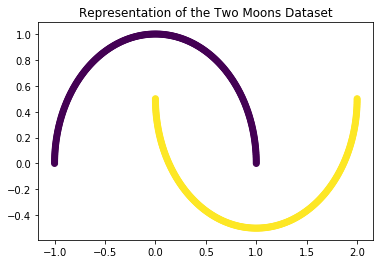

In [15]:
plt.scatter(X[:,0], X[:, 1], c = y/2)
plt.title('Representation of the Two Moons Dataset')
plt.show()

$\textbf{Remark : }$

The TwoMoons dataset is a perfect example of a dataset where euclidean metrics wouldn't allow us to find the right clusters. 
For instance, a K-means algorithm wouldn't get the right clusters.

In [16]:
# Let's represent the data in 2D after transforming it thanks to our Isomap implementation
iso = Isomap(k_neighbors=5, method='knn', n_components=2, n_iter= 500)
# The dissimilarity matrix we give is simply the one computing the Euclidean distances
def dissimilarity(data):
    '''
        Return the dissimilarity between the points in matrix `data` (n_samples, n_features).
        Here, the dissimilarity is the squared Euclidean norm. It could be something else.
    '''
    data_sq = np.sum(data**2, 1)
    D = data_sq + data_sq[:, None] - 2 * data.dot(data.T)
    return D
# Getting the dissimilarity matrix
D = dissimilarity(X)
# Fitting our instance of Isomap
iso.fit(D)

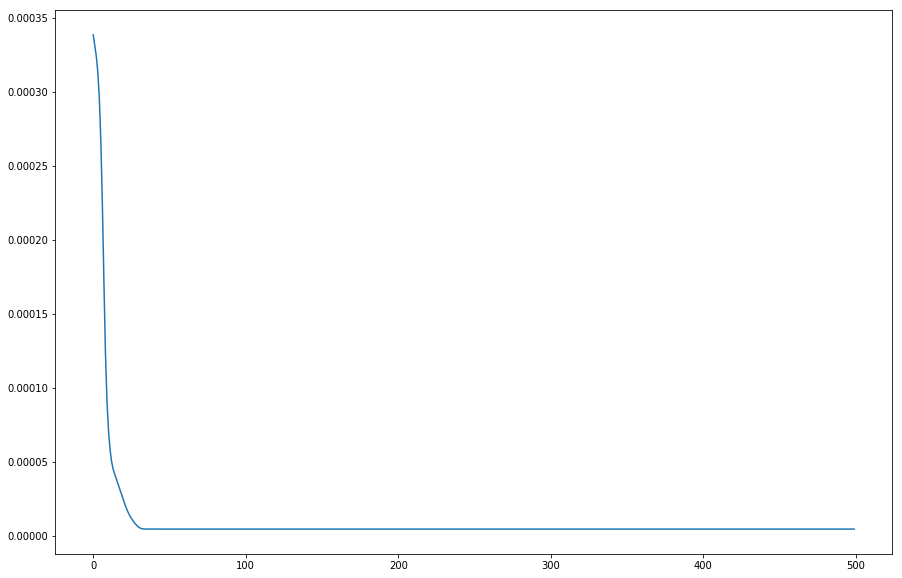

In [19]:
plt.figure(figsize=(15, 10))
plt.plot(iso.stress)
plt.show()

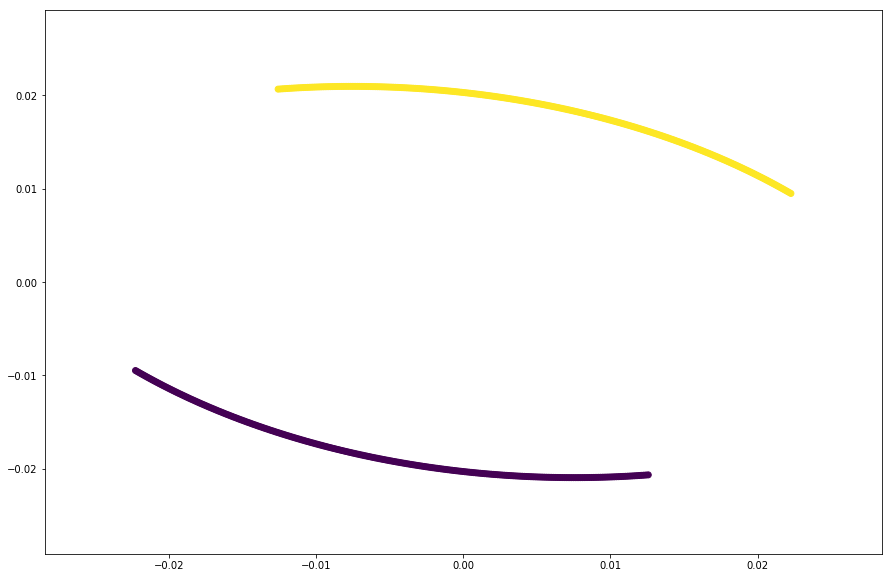

In [21]:
# Let's represent the data in 2D
plt.figure(figsize=(15, 10))
plt.scatter(iso.X_transformed[:, 0], iso.X_transformed[:, 1], c = y/2)
plt.show()

In [22]:
# Creating an instance of our Kmeans class
kmean = KMeans(k=2, max_iter=10000)
kmean.fit(iso.X_transformed)

In [23]:
from sklearn.metrics import accuracy_score
print('Accuracy :', max(accuracy_score(y, kmean.clusters), 1 - accuracy_score(y, kmean.clusters)))

Accuracy : 1.0


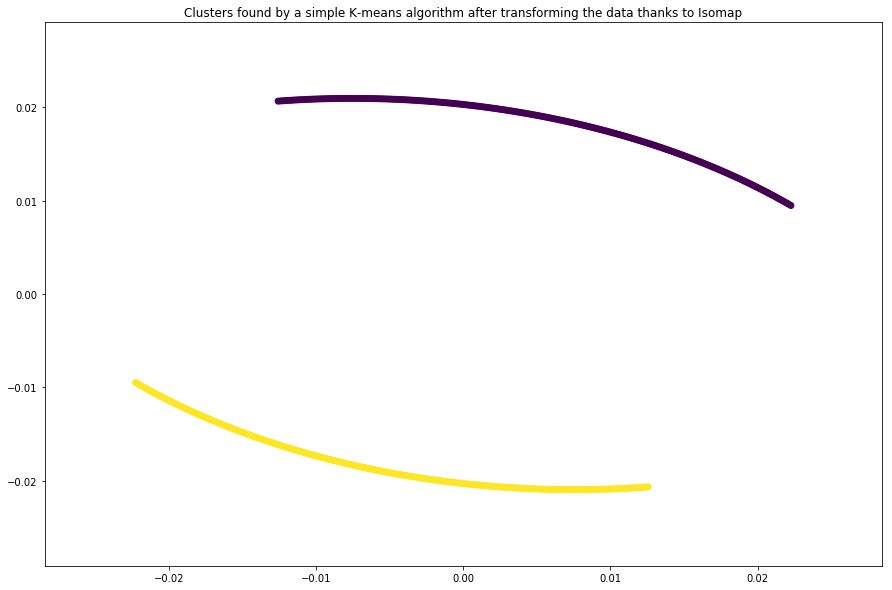

In [24]:
plt.figure(figsize=(15, 10))
plt.scatter(iso.X_transformed[:, 0], iso.X_transformed[:, 1], c = kmean.clusters/2)
plt.title('Clusters found by a simple K-means algorithm after transforming the data thanks to Isomap')
plt.show()

$\textbf{Remark : }$

Working on synthetic data shows us that our implementations of Isomap, MMDS and Kmeans are correct.
Let's now work on the real data that interests us : the 'Sales Transactions Weekly Dataset'

# Analysis of our algorithm on the 'Sales Transactions Weekly Dataset'

In [28]:
# reading the data
data = pd.read_csv('./data/Sales_Transactions_Dataset_Weekly.csv')

In [29]:
data.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


The data is composed of the product code, time-series values and normalized time-series values.
There are no labels.
We decide to only keep Normalized values.

In [30]:
# Keeping only normalized values
ind = [i for i in range(data.shape[1]) if 'Normalized' in data.columns[i]]
data = data.iloc[:, ind]

In [31]:
data.head()

,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,0.44,0.50,0.39,0.28,0.56,0.50,0.61,1.00,0.17,0.61,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,0.70,0.60,0.30,0.20,0.70,0.10,0.60,0.30,0.30,0.30,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,0.33,0.13,0.67,0.53,0.20,0.27,0.40,0.73,0.40,0.40,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [32]:
# Keeping only a numpy array
data = data.values

## Getting the affinity matrix (DTW)

We compute the Dynamic Time warping distances between all the time series and store them in the np array dtw

In [32]:
# dtw_ is an instance of our DTW class which computes the dynamic time warping distances
dtw_ = DTW(distance=l2)
dtw = dtw_.fit(data,verbose = True)

0.0 % done
1.2330456226880395 % done
2.466091245376079 % done
3.6991368680641186 % done
4.932182490752158 % done
6.165228113440198 % done
7.398273736128237 % done
8.631319358816276 % done
9.864364981504316 % done
11.097410604192355 % done
12.330456226880395 % done
13.563501849568436 % done
14.796547472256474 % done
16.029593094944513 % done
17.26263871763255 % done
18.495684340320594 % done
19.728729963008632 % done
20.96177558569667 % done
22.19482120838471 % done
23.42786683107275 % done
24.66091245376079 % done
25.893958076448833 % done
27.12700369913687 % done
28.36004932182491 % done
29.59309494451295 % done
30.826140567200987 % done
32.059186189889026 % done
33.292231812577064 % done
34.5252774352651 % done
35.75832305795315 % done
36.99136868064119 % done
38.224414303329226 % done
39.457459926017265 % done
40.6905055487053 % done
41.92355117139334 % done
43.15659679408138 % done
44.38964241676942 % done
45.62268803945746 % done
46.8557336621455 % done
48.088779284833535 % done
4

In [33]:
print(dtw)
print(dtw.shape)

[[0.     1.5263 2.341  ... 2.4369 2.9278 2.55  ]
 [1.5263 0.     2.2246 ... 3.2475 2.84   2.5909]
 [2.341  2.2246 0.     ... 3.9971 4.0291 4.7889]
 ...
 [2.4369 3.2475 3.9971 ... 0.     1.9375 1.9654]
 [2.9278 2.84   4.0291 ... 1.9375 0.     1.4813]
 [2.55   2.5909 4.7889 ... 1.9654 1.4813 0.    ]]
(811, 811)


In [41]:
# Saving dtw whose computation is long
np.save(arr=dtw, file='./dtw')

In [3]:
# Loading dtw
dtw = np.load(file='./dtw.npy')
print(dtw)

[[0.     1.5263 2.341  ... 2.4369 2.9278 2.55  ]
 [1.5263 0.     2.2246 ... 3.2475 2.84   2.5909]
 [2.341  2.2246 0.     ... 3.9971 4.0291 4.7889]
 ...
 [2.4369 3.2475 3.9971 ... 0.     1.9375 1.9654]
 [2.9278 2.84   4.0291 ... 1.9375 0.     1.4813]
 [2.55   2.5909 4.7889 ... 1.9654 1.4813 0.    ]]


We indeed notice that for the l2 norm we used, the diagonal of the dissimilarity matrix is always 0.

In [26]:
def get_closest(i, mat) :
    j = np.argsort(mat[i, :])[1]
    return j, mat[i,j]

Distance between 0 and its closest neighbor 547 : 0.8249


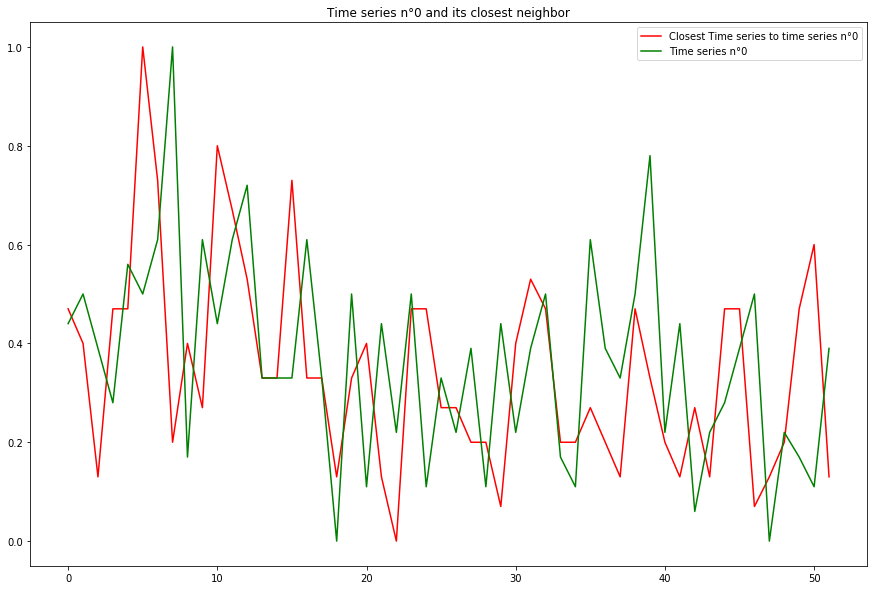

Distance between 1 and its closest neighbor 616 : 1.0414999999999994


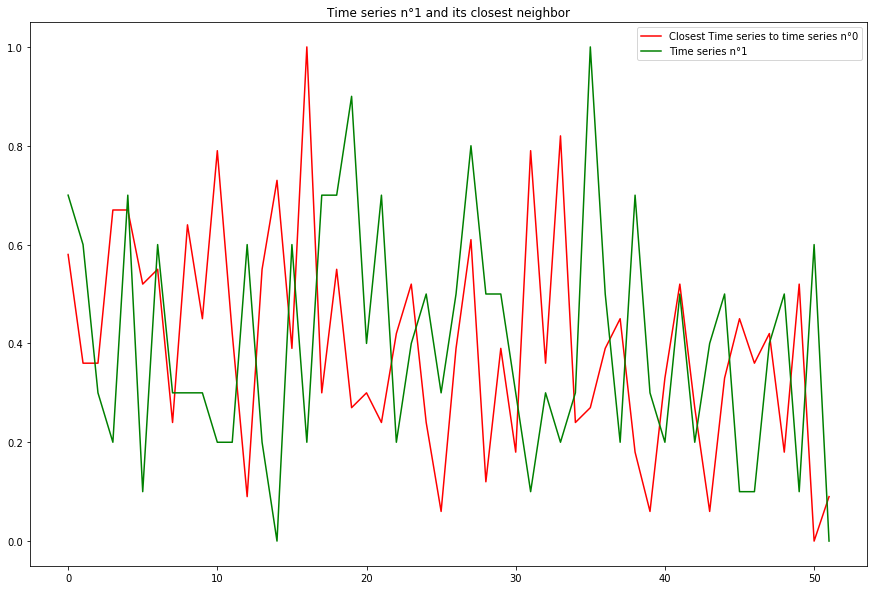

Distance between 2 and its closest neighbor 631 : 1.2954999999999999


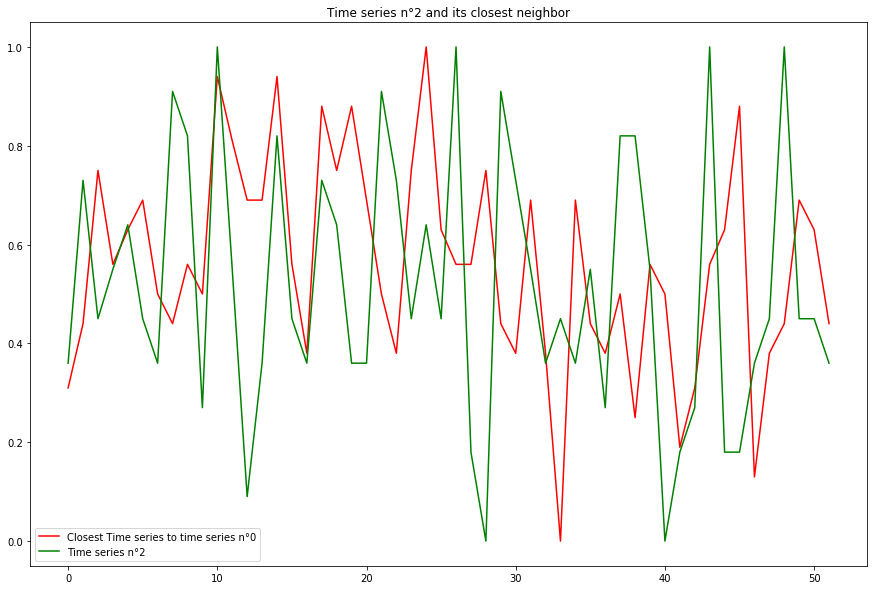

Distance between 3 and its closest neighbor 311 : 0.8337000000000001


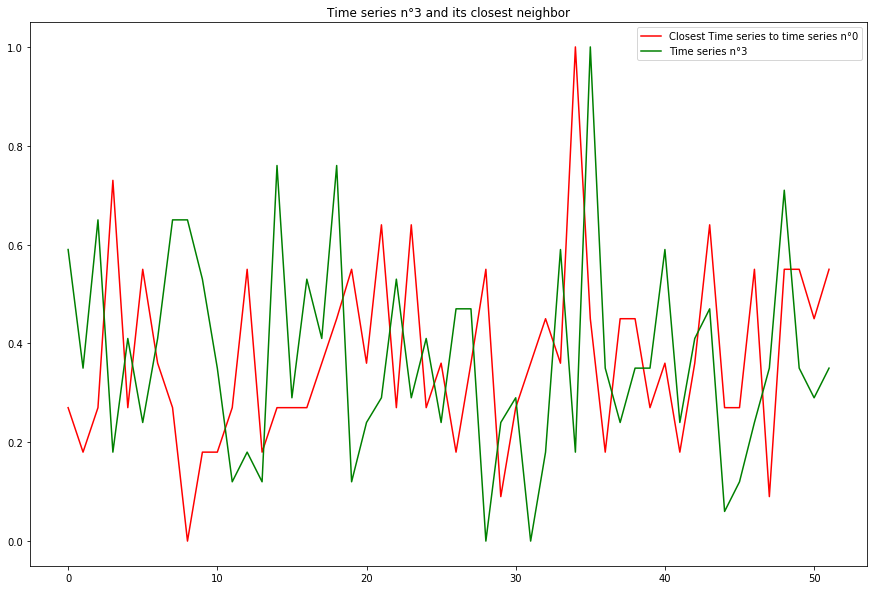

Distance between 4 and its closest neighbor 168 : 0.8916000000000003


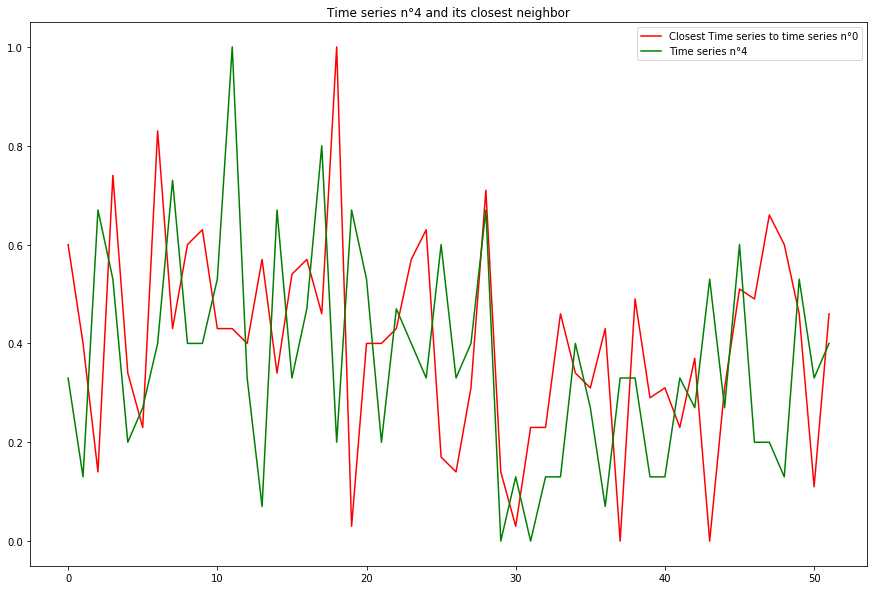

Distance between 5 and its closest neighbor 429 : 0.8054000000000003


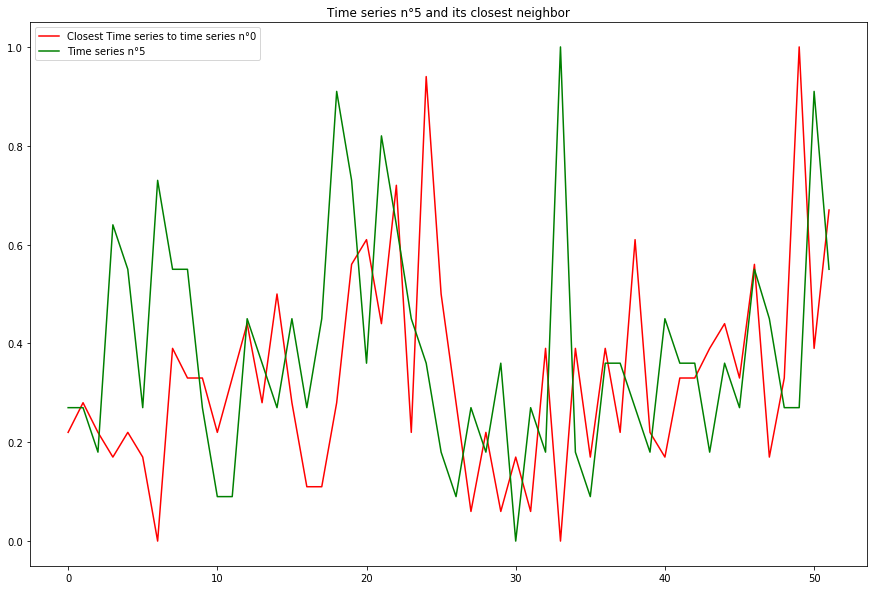

Distance between 6 and its closest neighbor 59 : 0.8920999999999999


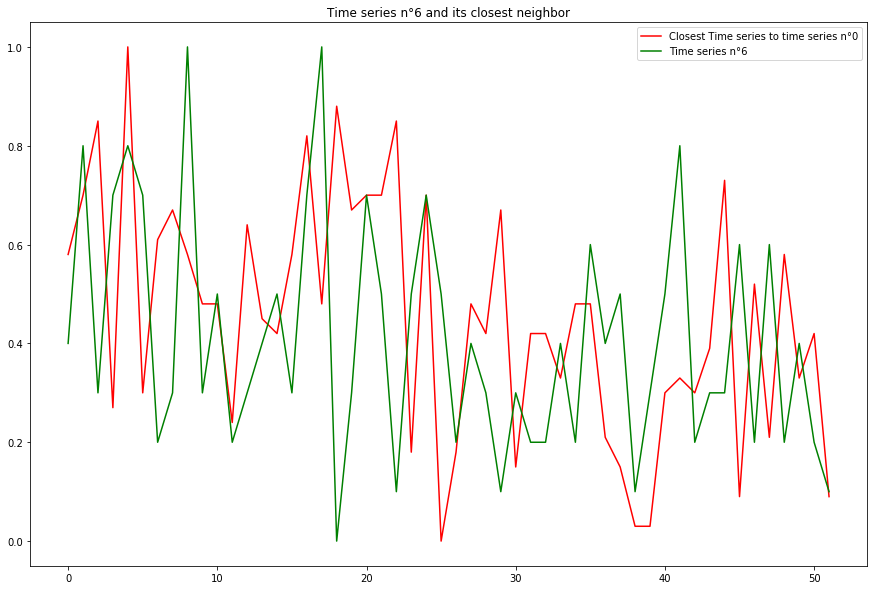

Distance between 7 and its closest neighbor 163 : 1.1202999999999999


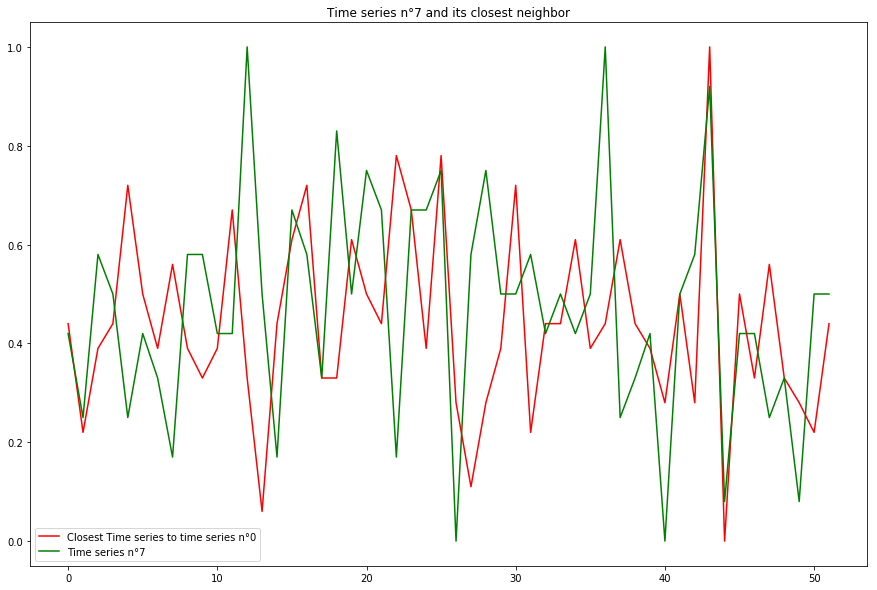

Distance between 8 and its closest neighbor 432 : 0.9481999999999998


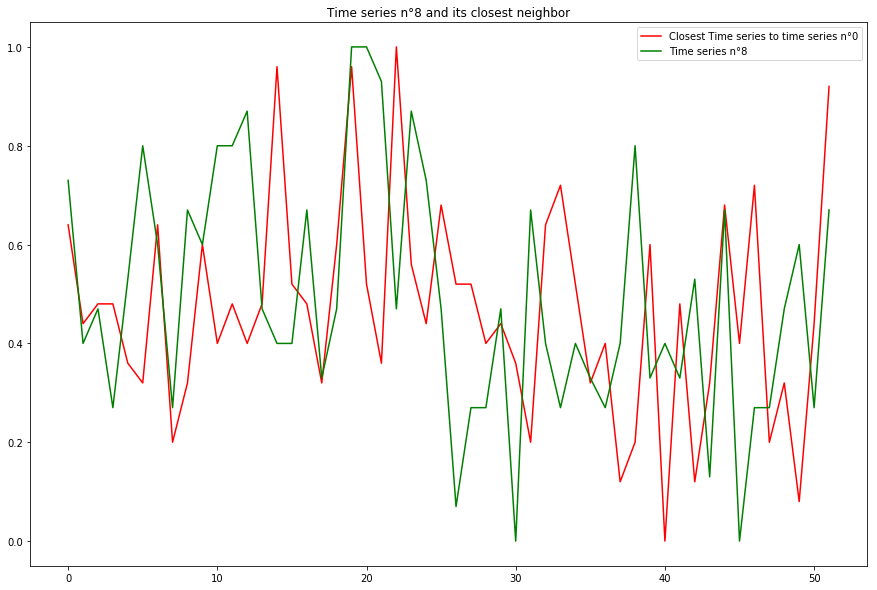

Distance between 9 and its closest neighbor 333 : 0.7161000000000001


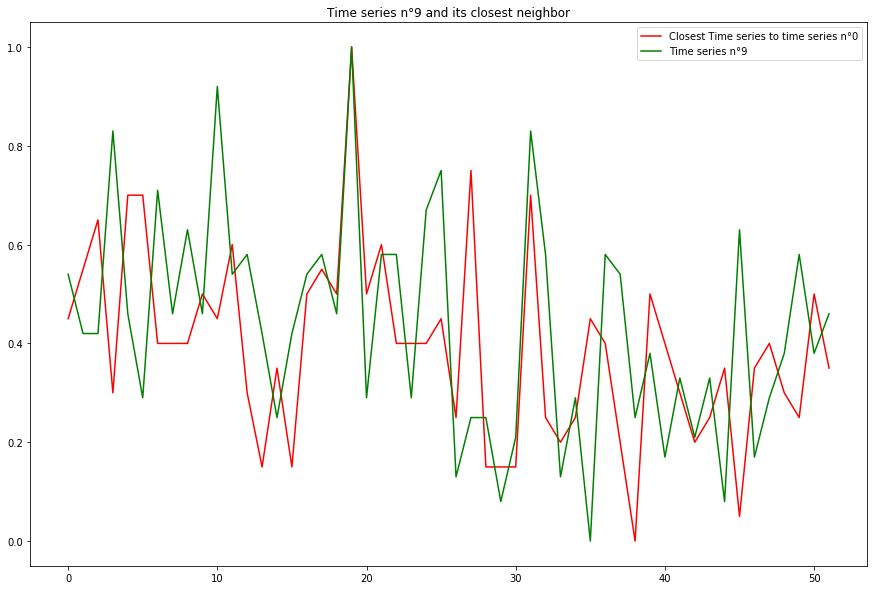

In [33]:
# Let's plot the closest neighbors of some time series
for i in range(10) :
    closest_i, dist = get_closest(i, dtw)
    print('Distance between {} and its closest neighbor {} : {}'.format(i, closest_i, dist))
    plt.figure(figsize = (15, 10))
    plt.plot(data[closest_i, :], color = 'r', label ='Closest Time series to time series n°0')
    plt.plot(data[i, :], color = 'green', label = 'Time series n°{}'.format(i))
    plt.legend()
    plt.title('Time series n°{} and its closest neighbor'.format(i))
    plt.show()

## Reducing the dimension using Isomap

In [40]:
# Creating an instance of isomap
iso = Isomap(k_neighbors=3, n_components=2, method='knn', n_iter=1000)
# Fitting it on the dynam time warping distances
iso.fit(dtw, verbose=False) 
#fill_inf = True allows us to deal with path when they are equal to np.inf between two time series

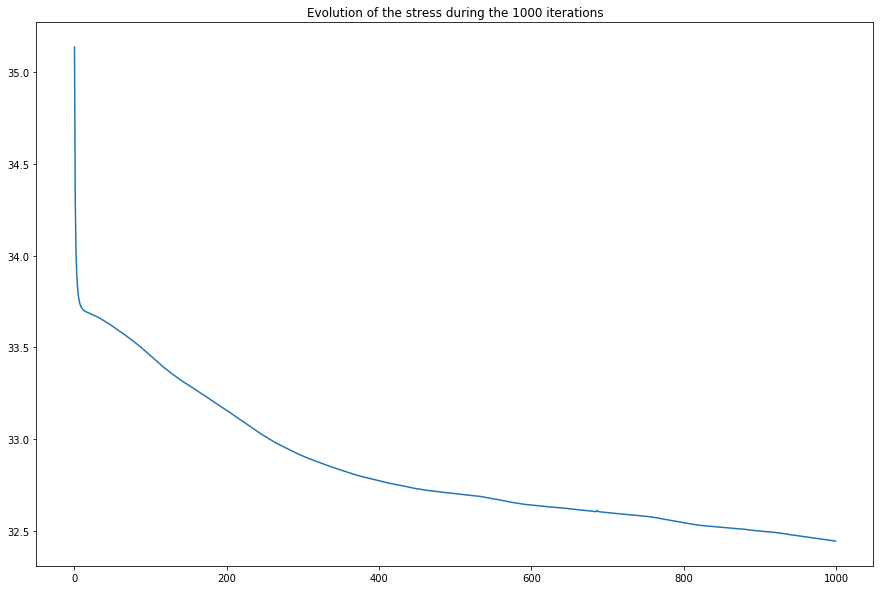

Final stress : 32.44450648489824


In [41]:
# Let's check that the stress has indeed decreased during our training
plt.figure(figsize=(15, 10))
plt.plot(iso.stress)
plt.title('Evolution of the stress during the {} iterations'.format(iso.niter))
plt.show()
print('Final stress : {}'.format(iso.stress[-1]))

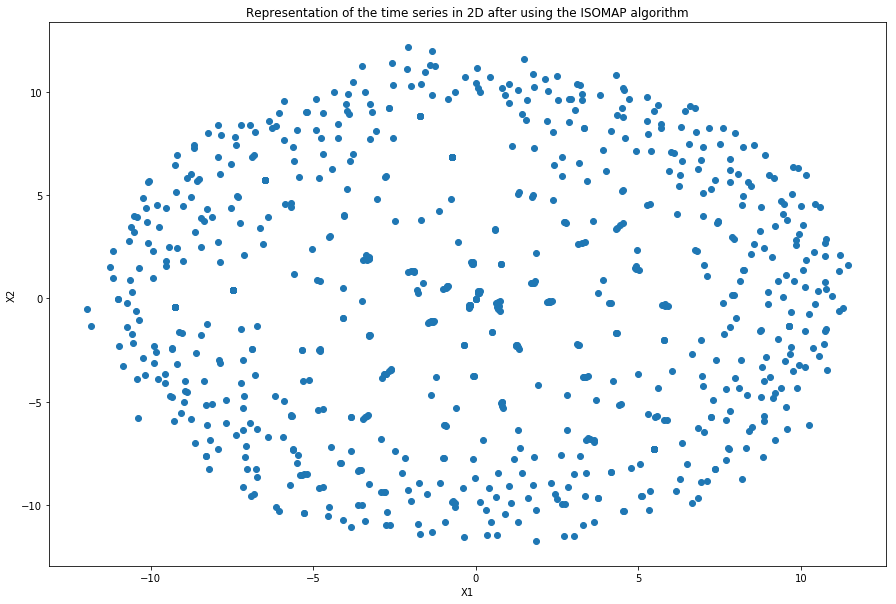

In [42]:
# Let's plot the time series in 2D
plt.figure(figsize=(15, 10))
plt.scatter(iso.X_transformed[:,0], iso.X_transformed[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Representation of the time series in 2D after using the ISOMAP algorithm')
plt.show()

In [43]:
# Let's add more components to ISOMAP to check that the final stress is indeed lower.
# Creating an instance of isomap
iso_ = Isomap(k_neighbors=3, n_components=5, method='knn', n_iter=1000)
# Fitting it on the dynam time warping distances
iso_.fit(dtw, fill_inf=True, verbose=False) 
#fill_inf = True allows us to deal with path when they are equal to np.inf between two time series

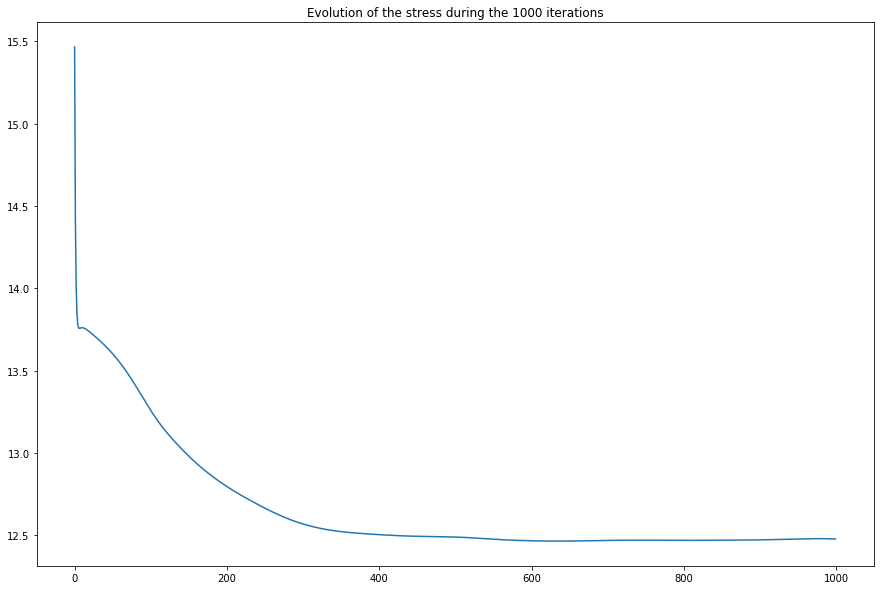

Final stress : 12.477021050761582


In [44]:
# Let's check that the stress is lower than when ISOMAP is trained with 2 components
plt.figure(figsize=(15, 10))
plt.plot(iso_.stress)
plt.title('Evolution of the stress during the {} iterations'.format(iso_.niter))
plt.show()
print('Final stress : {}'.format(iso_.stress[-1]))

In [ ]:
plt.plot(iso_.stress)

$\textbf{Remarks :}$

We notice that :
- the stress is indeed decreasing, which shows that SMACOF algorithm is working.
- when reducing to a higher dimension (5 instead of 2), the stress ois lower : 12. instead of 32. which is normal since the constraints are weaker.
- in the 2D representation, it is quite hard to find clear clusters.

# Clustering the time series thanks to a simple k_means

In [45]:
# Getting the reduced time_series
X_transformed = iso_.X_transformed
print('New shape of X_transformed : ', X_transformed.shape)

New shape of X_transformed :  (811, 5)


In [52]:
from src.kmean import *
kmeans = KMeans(k=3, max_iter = 1000)
kmeans.fit(X_transformed)

In [53]:
print('Clusters found by the kmeans algorithm (k = {}) : \n'.format(kmeans.k))
print(kmeans.clusters)

Clusters found by the kmeans algorithm (k = 3) : 

[1. 1. 2. 1. 0. 0. 2. 0. 0. 0. 2. 0. 2. 2. 0. 2. 2. 2. 0. 2. 2. 2. 2. 2.
 0. 2. 2. 1. 0. 2. 2. 0. 2. 2. 0. 0. 2. 2. 0. 2. 2. 2. 0. 1. 0. 1. 0. 1.
 1. 2. 2. 2. 2. 2. 1. 2. 2. 0. 0. 2. 0. 2. 2. 2. 0. 2. 2. 0. 1. 0. 2. 2.
 2. 2. 0. 2. 2. 2. 2. 2. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 0. 0.
 2. 2. 0. 2. 1. 2. 2. 1. 0. 2. 2. 2. 2. 0. 1. 2. 1. 2. 1. 0. 0. 0. 2. 2.
 1. 0. 0. 2. 0. 2. 1. 2. 2. 1. 0. 2. 1. 0. 1. 1. 1. 1. 0. 2. 2. 2. 2. 0.
 0. 2. 2. 2. 2. 2. 0. 2. 2. 0. 1. 0. 2. 0. 0. 0. 0. 1. 1. 0. 2. 1. 2. 0.
 0. 2. 2. 2. 1. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 0. 1. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 0. 2. 2. 0. 2. 0. 0. 2. 2. 0. 1. 2. 2. 1. 1. 2. 1. 0. 2.
 2. 0. 1. 1. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 0. 2. 0. 1. 2. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 2. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 2. 2. 0.
 0. 2. 2. 0. 2. 1. 0. 1. 1. 0. 1. 1. 2. 2. 1. 2. 1. 1. 1. 2. 2. 2. 2. 0.
 1. 2. 0. 1. 0. 2. 2. 1. 1. 1. 2. 0. 1. 2. 2. 0. 2. 1. 2. 0. 1. 1. 1. 2.


## Time Series Averaging

In [54]:
# We import the code allowing us to perform time-series averaging, this is F. PetitJean's code
from src.DBA import *

In [55]:
# We create a dictionnary s.t dic[k] is a list that contains the time-series whose cluster is cluster k
dic = {}
for k in range(kmeans.k) :
    dic[k] = []
for i in range(data.shape[0]) :
    dic[kmeans.clusters[i]].append(data[i, :])

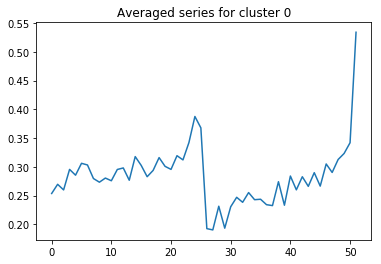

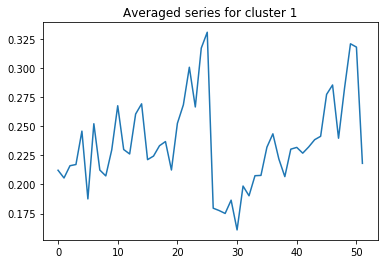

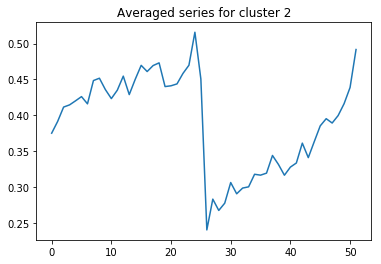

In [56]:
# We perform the DBA thanks to the code provided on GitHub by F. Petitjean
for k in range(kmeans.k) :
    seriesk = np.array(dic[k])
    average_series_k = performDBA(seriesk)
    plt.plot(average_series_k)
    plt.title('Averaged series for cluster {}'.format(k))
    plt.show()

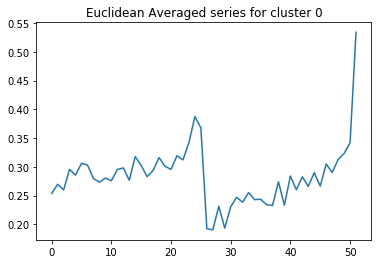

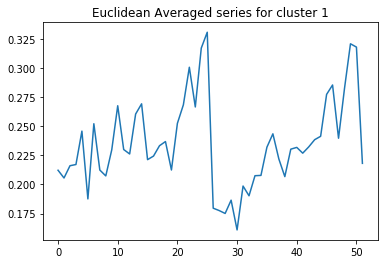

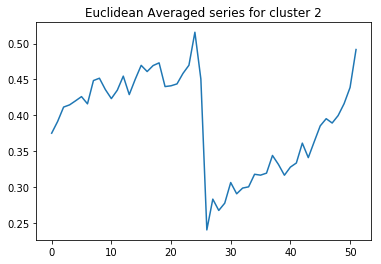

In [57]:
# Let's check the euclidean averaging we would by taking the mean
for k in range(kmeans.k) :
    l = len(dic[k])
    s = np.zeros((dic[k][0].shape[0]))
    for j in range(l) :
        s += dic[k][j] / l
    plt.plot(s)
    plt.title('Euclidean Averaged series for cluster {}'.format(k))
    plt.show()